In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import gauss
from random import sample
import math

## Q1.1

In [2]:
N = 240 # number of time points
V = 441 # number of observed variables
x1 = x2 = 21 
nsrcs = 6 # number of sources

# create a function to generate TCs
def create_TC(AV, IV, DO):
    
    TC = np.array([])
    IV_val = IV
    
    # inputting the onsets arrival vector (AV)
    TC = np.zeros(AV)
    
    while len(TC) < N:
        
        # inputting the duration of ones (DO)
        for i in range(DO):
            if len(TC) >= N:
                break
            TC = np.append(TC, 1)

        # inputting the increment vector (IV)
        while (len(TC) < IV_val) & (len(TC) < N):
            TC = np.append(TC, 0)
        IV_val += IV
        
        for i in range(AV):
            if len(TC) >= N:
                break
            TC = np.append(TC, 0)
    
    # standardize TC
    TC = (TC - np.mean(TC))/np.std(TC)
    
    return TC

In [3]:
# input values to create TC

TC_1 = create_TC(0, 30, 15)
TC_2 = create_TC(20, 45, 20)
TC_3 = create_TC(0, 60, 25)
TC_4 = create_TC(0, 40, 15)
TC_5 = create_TC(0, 40, 20)
TC_6 = create_TC(0, 40, 25)
TC_full = [TC_1, TC_2, TC_3, TC_4, TC_5, TC_6]

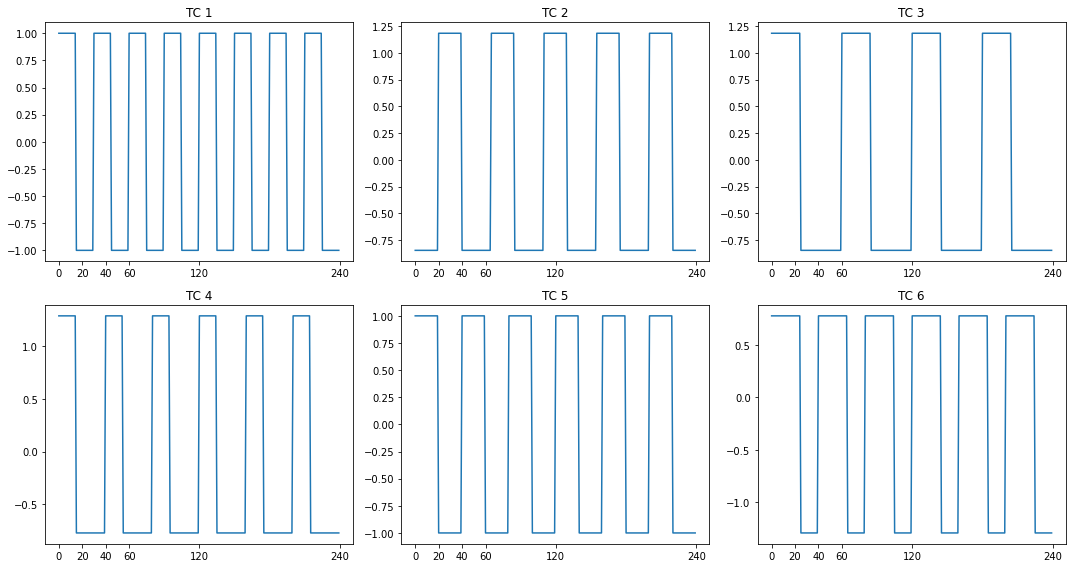

In [4]:
# plotting the graphs of each TC

figure, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,8))

plt.setp(axes, xticks=[0, 20, 40, 60, 120, 240])

axes[0, 0].plot(range(240), TC_full[0])
axes[0, 1].plot(range(240), TC_full[1])
axes[0, 2].plot(range(240), TC_full[2])
axes[1, 0].plot(range(240), TC_full[3])
axes[1, 1].plot(range(240), TC_full[4])
axes[1, 2].plot(range(240), TC_full[5]) 


axes[0, 0].set_title("TC 1")
axes[0, 1].set_title("TC 2")
axes[0, 2].set_title("TC 3")
axes[1, 0].set_title("TC 4")
axes[1, 1].set_title("TC 5")
axes[1, 2].set_title("TC 6")

plt.savefig("../plots/The 6 TCs.png")
figure.tight_layout()



## Q1.2

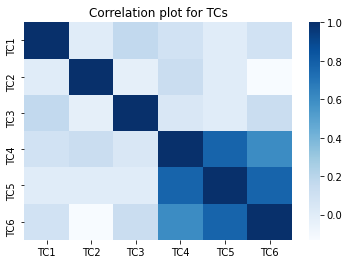

In [5]:
# Generate a correlation plot to check for correlation

TC_labels = list()
for i in range(1, 7):
    label = "TC" + str(i)
    TC_labels.append(label)

# correlation = np.corrcoef(TC_full)
convert_to_df = pd.DataFrame(TC_full)
TC_df = convert_to_df.T
correlation = TC_df.corr()
corr_plot = sns.heatmap(correlation, cmap = 'Blues', xticklabels = TC_labels, yticklabels = TC_labels)
corr_plot.set_title("Correlation plot for TCs")
plt.savefig('../plots/Correlation plot for TCs.png')
plt.show()

## Q1.3

In [6]:
# create a function to construct an array tmpSM
# inputs are the vertical and horizontal directions of the slices

def generate_tmpSM(vertical_begin,vertical_fin, horizontal_begin, horizontal_fin):
  
    # create an inital tmpSM matrix
    tmpSM = np.zeros(441).reshape((21,21))
    
    # add the 1s into the tmpSM matrix according to the input
    tmpSM[vertical_begin:vertical_fin, horizontal_begin:horizontal_fin] = 1
  
    return tmpSM

In [7]:
# generate the 6 vectored SMs

tmpSM_1 = generate_tmpSM(2, 6, 2, 6)
tmpSM_2 = generate_tmpSM(2, 6, 15, 19)
tmpSM_3 = generate_tmpSM(8, 13, 2, 6)
tmpSM_4 = generate_tmpSM(8, 13, 15, 19)
tmpSM_5 = generate_tmpSM(15, 19, 2, 6)
tmpSM_6 = generate_tmpSM(15, 19, 15, 19)

tmpSM = np.array([tmpSM_1, tmpSM_2, tmpSM_3, tmpSM_4, tmpSM_5, tmpSM_6])

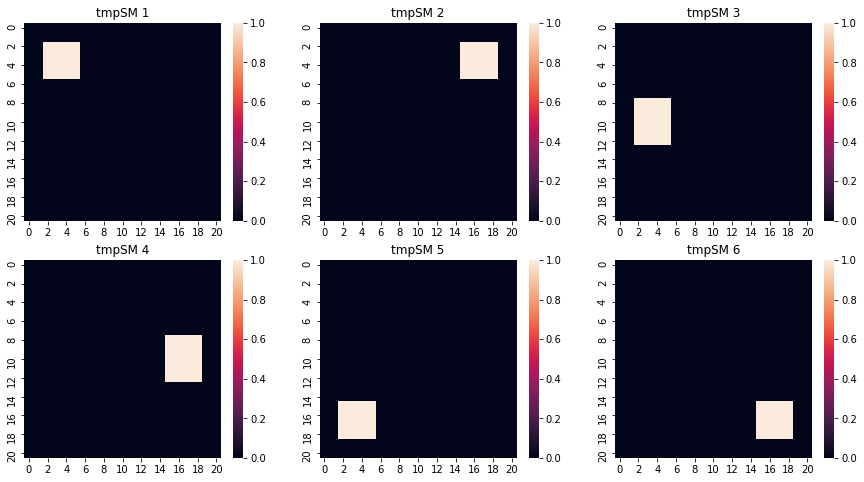

In [8]:
# plot the SMs in 6 subplots

figure, axes = plt.subplots(2, 3, figsize=(15,8))

sns.heatmap(tmpSM[0], ax = axes[0, 0])
sns.heatmap(tmpSM[1], ax = axes[0, 1])
sns.heatmap(tmpSM[2], ax = axes[0, 2])
sns.heatmap(tmpSM[3], ax = axes[1, 0])
sns.heatmap(tmpSM[4], ax = axes[1, 1])
sns.heatmap(tmpSM[5], ax = axes[1, 2])

axes[0, 0].set_title("tmpSM 1")
axes[0, 1].set_title("tmpSM 2")
axes[0, 2].set_title("tmpSM 3")
axes[1, 0].set_title("tmpSM 4")
axes[1, 1].set_title("tmpSM 5")
axes[1, 2].set_title("tmpSM 6")

plt.savefig("../plots/6 SMs for tmpSM")

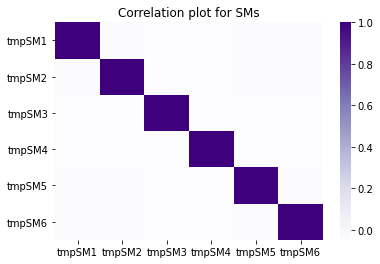

In [9]:
# check if the 6 vectored SMs are independent

tmpSM_labels = list()
for i in range(1, 7):
    label = "tmpSM" + str(i)
    tmpSM_labels.append(label)

SM = np.reshape(tmpSM, (6, 441))
convert_to_df = pd.DataFrame(SM)
tmpSM_df = convert_to_df.T
correlation = tmpSM_df.corr()
corr_plot = sns.heatmap(correlation, cmap = 'Purples', xticklabels = tmpSM_labels, yticklabels = tmpSM_labels)
corr_plot.set_title("Correlation plot for SMs")
plt.savefig('../plots/Correlation plot for SMs.png')
plt.show()

## Q1.4

In [10]:
# generate the zero mean white Gaussian noise for temporal source
temp_val = [0 for i in range(1440)]
for i in range(1440):
    temp_val[i] = gauss(0.0, math.sqrt(0.25))
noise_temporal = np.array(temp_val)
noise_temporal = noise_temporal.reshape((240, 6))

# generate the zero mean white Gaussian noise for spatial source
spa_val = [0 for i in range(2646)]
for i in range(2646):
    spa_val[i] = gauss(0.0, math.sqrt(0.015))
noise_spatial = np.array(spa_val)
noise_spatial = noise_spatial.reshape((6, 441))

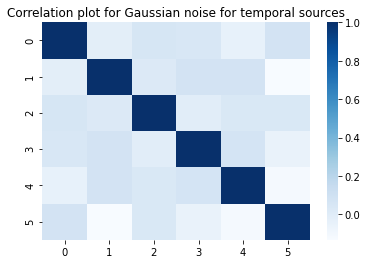

In [11]:
# check if the 6x6 correlation matrix (CM) for the temporal noise are correlated across the sources
noise_temporal_df = pd.DataFrame(noise_temporal)
temporal_corr = noise_temporal_df.corr()
temporal_corr_plot = sns.heatmap(temporal_corr, cmap='Blues')
temporal_corr_plot.set_title("Correlation plot for Gaussian noise for temporal sources")
plt.savefig("../plots/Correlation plot for Gaussian noise for temporal sources.png")

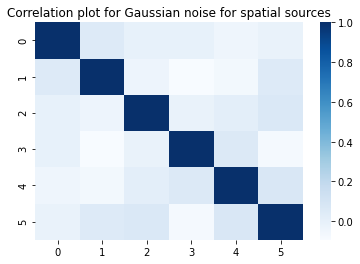

In [12]:
# check if the 6x6 correlation matrix (CM) for the spatial noise are correlated across the sources
noise_spatial_df = pd.DataFrame(noise_spatial)
noise_spatial_df = noise_spatial_df.T
spatial_corr = noise_spatial_df.corr()
spatial_corr_plot = sns.heatmap(spatial_corr, cmap='Blues')
spatial_corr_plot.set_title("Correlation plot for Gaussian noise for spatial sources")
plt.savefig("../plots/Correlation plot for Gaussian noise for spatial sources.png")


Mean of temporal noise source:  -0.002362558315744658
Variance of temporal noise source:  0.25938972700559587
Variance of 1.96*sigma:  0.9982342286581326


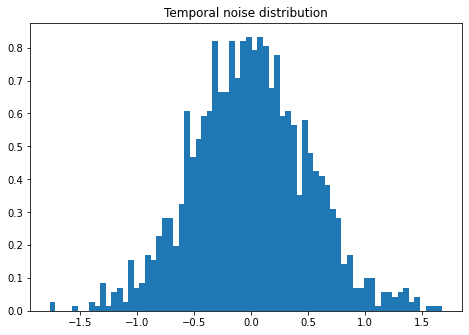

In [13]:
# Histogram for the temporal noise distribution

fig = plt.figure(figsize=(6,4))
axis = fig.add_axes([0,0,1,1])
axis.hist(noise_temporal.flatten(), bins = 70, density = True, stacked = True)
axis.set_title("Temporal noise distribution")
plt.savefig("../plots/Temporal noise distribution.png")

# check if variance if equal to 1.96*sigma
variance = 1.96 * noise_temporal.std()

print("Mean of temporal noise source: ", np.mean(noise_temporal))
print("Variance of temporal noise source: ", noise_temporal.var())
print("Variance of 1.96*sigma: ", variance)

Mean of spatial noise source:  -0.008050876577312847
Actual variance of spatial noise source:  0.01543128040032003
Variance of 1.96*sigma:  0.24347650150655079


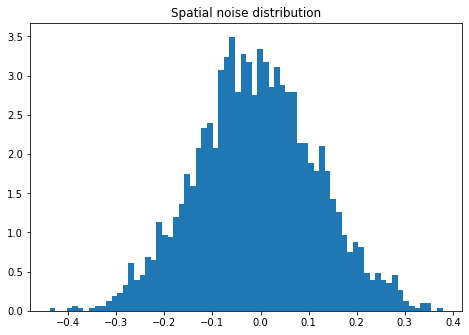

In [14]:
# Histogram for the spatial noise distribution
fig = plt.figure(figsize=(6,4))
axis = fig.add_axes([0,0,1,1])
axis.hist(noise_spatial.flatten(), bins = 70, density = True, stacked = True)
axis.set_title("Spatial noise distribution")
plt.savefig("../plots/Spatial noise distribution.png")

# check if variance if equal to 1.96*sigma
variance = 1.96 * noise_spatial.std()

print("Mean of spatial noise source: ", np.mean(noise_spatial))
print("Actual variance of spatial noise source: ", noise_spatial.var())
print("Variance of 1.96*sigma: ", variance)

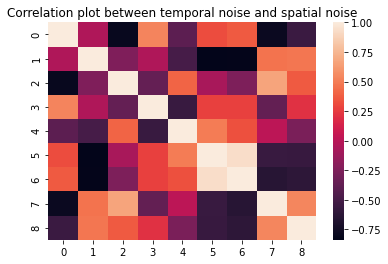

In [15]:
# check whether the normal distributions fulfills criteria of the mean=0 and variance of 1.96*sigma
# visualise the correlation between the temporal noise and spatial noise sources using a CM
temp_spa = np.dot(noise_temporal, noise_spatial)
temp_spa_df = pd.DataFrame(temp_spa)
sample_TtTs_df = temp_spa_df[[0, 1, 2, 3, 4, 5, 6, 7, 8]]
temp_spa_corr = sample_TtTs_df.corr()
temp_spa_corr_plot = sns.heatmap(temp_spa_corr)
temp_spa_corr_plot.set_title("Correlation plot between temporal noise and spatial noise")
plt.savefig("../plots/Correlation plot between temporal noise and spatial noise.png")

## Q1.5

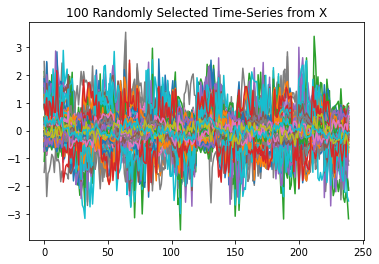

In [16]:
# generate a synthetic dataset X of size 240 x 441
X = np.dot((TC_df + noise_temporal), (SM + noise_spatial))

X_df = pd.DataFrame(X)

# randomly select at least 100 time-series from X
np.random.seed(1)
samples = np.random.randint(441, size=100)
X_sample = X_df.iloc[:, samples]

# plot the sampled time-series from X
plt.plot(X_sample)
plt.title("100 Randomly Selected Time-Series from X")
plt.savefig("../plots/100 Randomly Selected Time-Series from X.png")
plt.show()

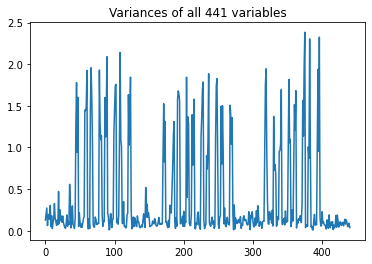

In [17]:
# Plot the variances of all 441 variables 

variances = np.var(X_df, axis=0)
plt.plot(variances)
plt.title("Variances of all 441 variables")
plt.savefig("../plots/Variances of all 441 variables")
plt.show()

In [18]:
# Standardize X 
X = X - np.mean(X)
X = X / np.std(X)
X_df = X_df - np.mean(X_df)
X_df = X_df / np.std(X_df)

## Q2.1

In [19]:
# construct the equation for the least square solution (A_LSR and D_LSR)

DT = np.transpose(TC_df)
DTD = np.dot(DT, TC_df)
DTD_inv = np.linalg.inv(DTD)
DTX = np.dot(DT, X)
A_lsr = np.dot(DTD_inv, DTX)
D_LSR = np.dot(X, np.transpose(A_lsr))

A_LSR = A_lsr.reshape(6, 21, 21)

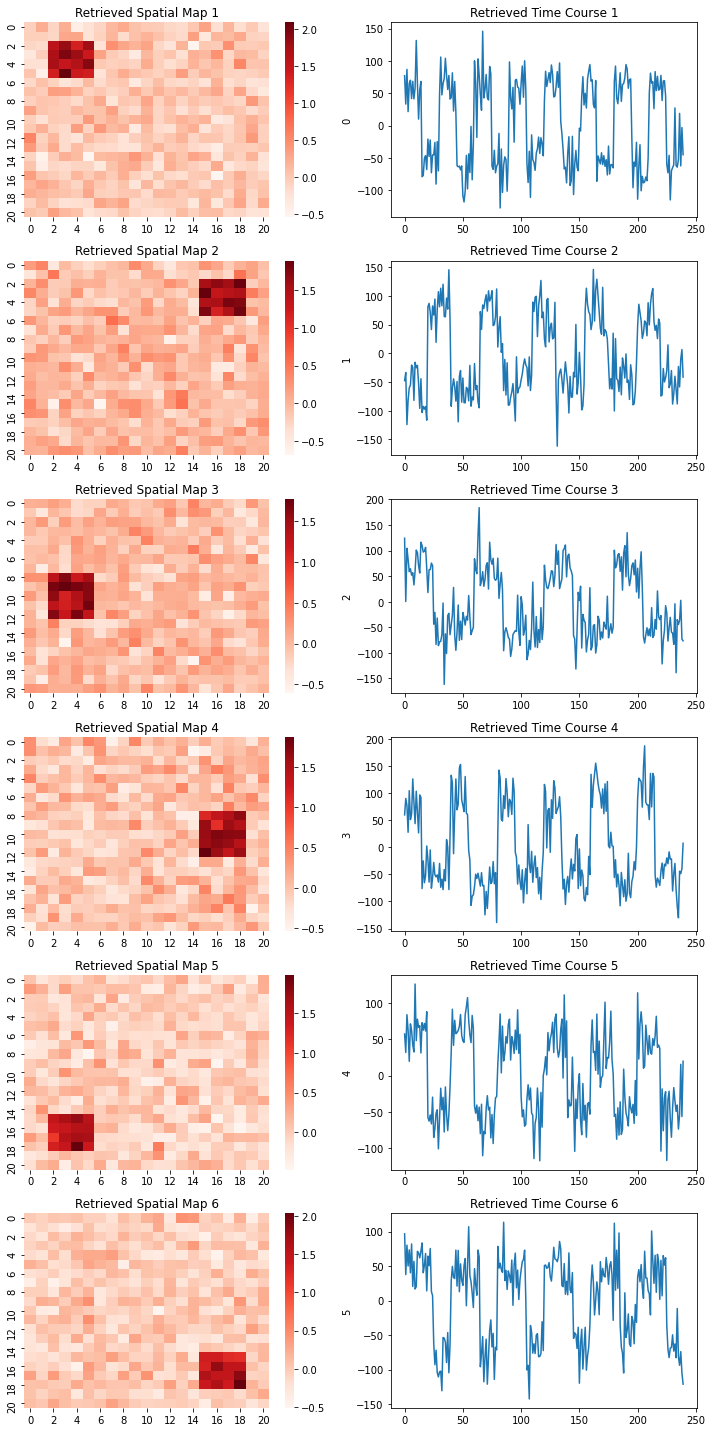

In [20]:
# plot the retrieved SMs and TCs
figure, axes = plt.subplots(6, 2, figsize=(10,20))

DLSR_df = pd.DataFrame(D_LSR)
for c in range(0, len(A_LSR)):
    sns.heatmap(data = A_LSR[c], cmap="Reds", ax = axes[c][0])
    axes[c, 0].set_title("Retrieved Spatial Map " + str(c + 1))
    sns.lineplot(data = DLSR_df[c], ax = axes[c][1])
    axes[c, 1].set_title("Retrieved Time Course " + str(c + 1))
plt.savefig("../plots/SMs and TCs.png")
plt.tight_layout()
plt.show()

/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


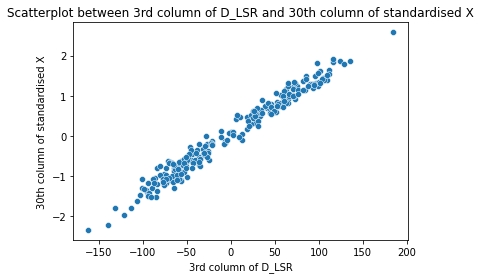

In [21]:
# generate a scatterplot to illustrate the relationship between the 3rd column of D_LSR and 30th column of standardised X

sns.scatterplot(DLSR_df[2], X_df[9*21 + 2])
plt.xlabel("3rd column of D_LSR")
plt.ylabel("30th column of standardised X")
plt.title("Scatterplot between 3rd column of D_LSR and 30th column of standardised X")
plt.savefig("../plots/Scatterplot between 3rd column of D_LSR and 30th column of standardised X")
plt.show()

/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


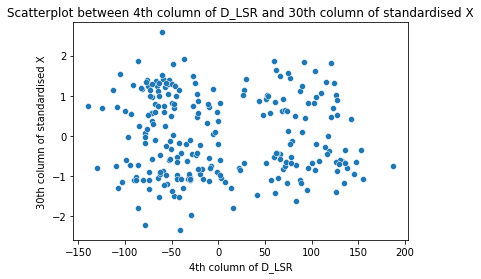

In [22]:
# generate a scatterplot to illustrate the relationship between the 4th column of D_LSR and 30th column of standardised X

sns.scatterplot(DLSR_df[3], X_df[9*21 + 2])
plt.xlabel("4th column of D_LSR")
plt.ylabel("30th column of standardised X")
plt.title("Scatterplot between 4th column of D_LSR and 30th column of standardised X")
plt.savefig("../plots/Scatterplot between 4th column of D_LSR and 30th column of standardised X")
plt.show()

## Q2.2

In [23]:
# construct the equations for the ridge regression (RR) parameters (A_RR and D_RR)

lamda_tilde = 0.6 * V
I = np.identity(6)
eqn = DTD + np.dot(lamda_tilde, I)
eqn_inv = np.linalg.inv(eqn)
A_RR = np.dot(eqn_inv, DTX)
D_RR = np.dot(X_df, np.transpose(A_RR))


In [24]:
# compute the sum of the correlation vectors (C_TLSR and C_TRR)
from scipy.stats import pearsonr

C_TLSR = list()
C_TRR = list()
DRR_df = pd.DataFrame(D_RR)

for i in range(nsrcs):
    C_TLSR.append(np.abs((np.corrcoef(TC_df[i], DLSR_df[i]))[0, 1]))
    C_TRR.append(np.abs((np.corrcoef(TC_df[i], DRR_df[i]))[0, 1]))

sum_CTLSR = sum(C_TLSR)
sum_CTRR = sum(C_TRR)
print("Sum of CTLSR: ", sum_CTLSR)
print("Sum of CTRR: ", sum_CTRR)
print("Sum of C_TRR greater than the sum of C_TLSR: ", sum_CTRR > sum_CTLSR)



Sum of CTLSR:  5.306499410738654
Sum of CTRR:  5.365882478486187
Sum of C_TRR greater than the sum of C_TLSR:  True


In [25]:
# using lambda=1000, the first vector from A_RR and the corresponding vector from A_LSR is plotted

lambda_val = 1000 * V
eqn2 = DTD + np.dot(lambda_val, I)
eqn2_inv = np.linalg.inv(eqn2)
ARR_2 = np.dot(eqn2_inv, DTX)

ARR_2_df = pd.DataFrame(ARR_2)
ARR_2_df = ARR_2_df.T

ALSR_df = pd.DataFrame(A_lsr)
ALSR_df = ALSR_df.T


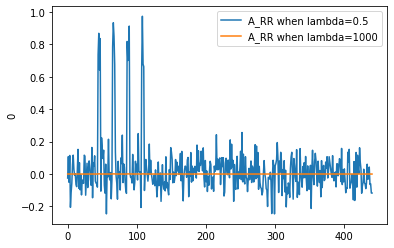

In [26]:
ARR_df = pd.DataFrame(np.transpose(A_RR))
sns.lineplot(data=ARR_df[0], label='A_RR when lambda=0.5')
sns.lineplot(data=ARR_2_df[0], label='A_RR when lambda=1000')
plt.savefig("../plots/A_RR vs. A_LSR.png")

## Q2.3

In [27]:
# create an array of rho values in the range of 0 to 1 with 0.05 increments

start = 0
n = 1.05
interval = 0.05
rho_list = np.arange(start, n , interval)


In [28]:
# Lasso Regression (adapted from the R-code given in the assignment spec)

X_array = X_df.to_numpy()
def lasso_reg(TC, X, rho):
    
    nsrcs = 6
    step = 1 / ((np.linalg.norm(TC @ np.transpose(TC))*1.1))
    thr = rho * 240 * step
    Ao = np.zeros((nsrcs,1))
    A = np.zeros((nsrcs,1))
    Alr = np.zeros((nsrcs,x1*x2))
    TC = TC.to_numpy()
    
    for k in range(x1*x2):
        A = Ao + step * np.dot((np.transpose(TC)), (X[:,k].reshape(240,1) - (TC @ Ao)))
        A = (1/(1+thr)) * (np.sign(A) * np.max([np.zeros(nsrcs), np.transpose(np.abs(A) - thr)[0]], axis = 0).reshape(6,1))
        for i in range(10):
            Ao = A
            A = Ao + step * np.dot((np.transpose(TC)), (X[:,k].reshape(240,1) - (TC @ Ao)))
            A = (1/(1+thr)) * (np.sign(A) * np.max([np.zeros(nsrcs), np.transpose(np.abs(A) - thr)[0]], axis = 0).reshape(6,1))
        Alr[:,k] = A.reshape(1,6)[0]
        
    return Alr

In [29]:
# to compute the mean square error (MSE)
def MSE(X, Dlr, Alr):
    return np.sum(np.sum(np.square(X - (Dlr @ Alr))))/(N*V)

MSEs = np.zeros((10, 21))

# iterate over the seed and rho combinations for 10 realisations using new standardized X each time
for i in range(10):
    for j, rho in enumerate(rho_list):
        np.random.seed(i)
        Tt_new = np.array([gauss(0.0, math.sqrt(0.25)) for i in range(240 * 6)])
        Tt_new = Tt_new.reshape((240, 6))
        Ts_new = np.array([gauss(0.0, math.sqrt(0.015)) for i in range(6 * 441)])
        Ts_new = Ts_new.reshape((6, 441)) 
        
        X_lasso = np.add(TC_df, Tt_new) @ np.add(SM, Ts_new)
        X_lasso = (X_lasso - np.mean(X_lasso, axis=0)) / np.std(X_lasso, axis=0)
        X_lasso = X_lasso.to_numpy()

        
        A_lasso = lasso_reg(TC_df, X_lasso, rho)
        D_lasso = np.dot(X_lasso, np.transpose(A_lasso))
        
        MSEs[i, j] = MSE(X_lasso, D_lasso, A_lasso)
        

In [30]:
# compute the average MSEs
avg_MSEs = np.mean(MSEs, axis = 0)
avg_MSEs

array([2.87099288e+03, 1.60133148e+03, 8.79452727e+02, 4.80548290e+02,
       2.60611975e+02, 1.36601319e+02, 6.50941862e+01, 3.18146173e+01,
       1.26810639e+01, 4.89704219e+00, 1.61617966e+00, 6.47975591e-01,
       5.45726498e-01, 6.62318590e-01, 8.27154606e-01, 9.30618992e-01,
       9.82619597e-01, 9.98088161e-01, 9.99988859e-01, 1.00000000e+00,
       1.00000000e+00])

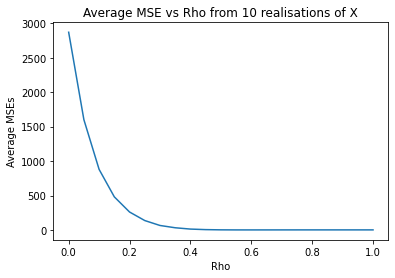

Best rho value is 0.6000000000000001 with an average MSE of 0.5457264975574663


In [31]:
# plot the average MSEs over the 10 realisations against each value of rho

plt.plot(rho_list, avg_MSEs)
plt.xlabel("Rho")
plt.ylabel("Average MSEs")
plt.title("Average MSE vs Rho from 10 realisations of X")
plt.savefig("../plots/Average MSE vs Rho from 10 realisations of X.png")
plt.show()

# value of rho that gives minimum MSE
best_rho = rho_list[np.argmin(avg_MSEs)]

# value of minimum MSE
min_avgMSE = min(avg_MSEs)
print(f"Best rho value is {best_rho} with an average MSE of {min_avgMSE}")

## Q2.4

In [32]:
# estimate the Lasso Regression (LR) parameters (Alr and Dlr) using rho=0.6
Alr = lasso_reg(TC_df, X, 0.6)
Dlr = np.dot(X, Alr.T)

In [33]:
Dlr_df = pd.DataFrame(Dlr)

In [34]:
# compute the sum of the four correlation vectors and compare them

Ctlr = list()
Ctrr = list()
Cslr = list()
Csrr = list()

for i in range(nsrcs):
    Ctlr.append(np.abs((np.corrcoef(TC_df[i], Dlr_df[i]))[0, 1]))
    Ctrr.append(np.abs((np.corrcoef(TC_df[i], DRR_df[i]))[0, 1]))
    Cslr.append(np.abs((np.corrcoef(SM[i], Alr[i]))[0, 1]))
    Csrr.append(np.abs((np.corrcoef(SM[i], A_RR[i]))[0, 1]))

print(f"Sum of ctlr coefficients: {sum(Ctlr)}")
print(f"Sum of ctrr coefficients: {sum(Ctrr)}")
print(f"Sum of cslr coefficients: {sum(Cslr)}")
print(f"Sum of csrr coefficients: {sum(Csrr)}")
print("Sum of C_TLR greater than sum of C_TRR: ", sum(Ctrr) < sum(Ctlr))
print("Sum of C_SLR greater than sum of C_SRR: ", sum(Csrr) < sum(Cslr))

Sum of ctlr coefficients: 5.4105858243430935
Sum of ctrr coefficients: 5.365882478486187
Sum of cslr coefficients: 5.595653204396694
Sum of csrr coefficients: 4.524624743156346
Sum of C_TLR greater than sum of C_TRR:  True
Sum of C_SLR greater than sum of C_SRR:  True


In [ ]:
# plot ALR, ARR, DLR and DRR
figure, axis = plt.subplots(6, 4, figsize = (40, 40), gridspec_kw=dict(width_ratios = [7, 7, 13, 13]))

for i in range(nsrcs):
    sns.heatmap(np.abs(Alr.reshape(6, 21, 21).swapaxes(1,2)[i]), cmap = "autumn", vmin = 0, vmax = 1, ax = axis[i][0])
    sns.heatmap(np.abs(A_RR.reshape(6, 21, 21).swapaxes(1,2)[i]), cmap = "autumn", vmin = 0, vmax = 1, ax = axis[i][1])
    axis[i, 0].set_title(f"ALR {i + 1}" + str(i + 1))
    axis[i, 1].set_title(f"ARR {i + 1}" + str(i + 1))
    axis[i][2].plot(Dlr_df.iloc[:, i])
    axis[i][2].set_title(f"DLR {i + 1}")
    axis[i][3].plot(DRR_df.iloc[:, i])
    axis[i][3].set_title(f"DRR {i + 1}")
plt.savefig("../plots/ALR vs. ARR vs. DLR vs. DRR.png")
    

## Q2.5

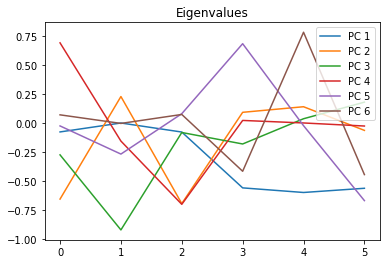

In [46]:
# plot the eigenvalues of PCs
PC_labels = ["PC 1", "PC 2", "PC 3", "PC 4", "PC 5", "PC 6"]
for i in range(nsrcs):
    u, s, v = np.linalg.svd(TC_df)
    plt.plot(v[i])
    plt.legend(PC_labels, loc="upper right")
plt.title("Eigenvalues")
plt.savefig("../plots/Eigenvalues.png")

In [36]:
# compute the PC with the smallest eigenvalue

min_val = []
for i in range(6):
    u, s, v = np.linalg.svd(TC_df)
    min_val.append(np.min(v[i]))
    smallest_val = np.min(min_val)
    min_index = min_val.index(smallest_val)
print("PC", {min_index + 1}, "has the smallest eigenvalue")
print("Smallest eigenvalue: ", smallest_val)


PC {3} has the smallest eigenvalue
Smallest eigenvalue:  -0.9228610955020659


In [37]:
# perform Principal Component Regression (PCR)
u, s, v = np.linalg.svd(TC_df, 6)
Z = u @ TC_df

In [38]:
Z.shape

(240, 6)

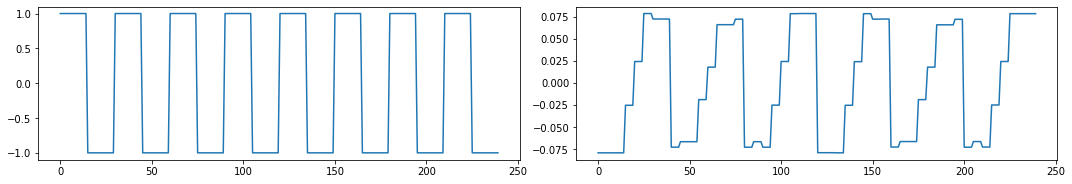

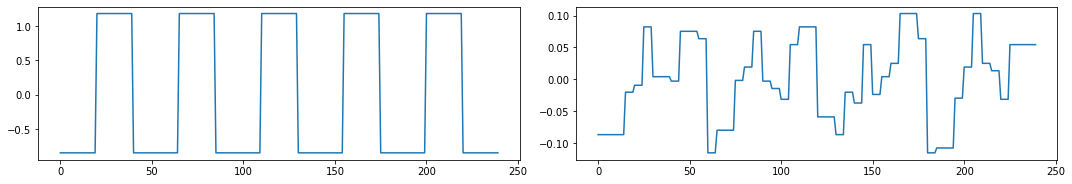

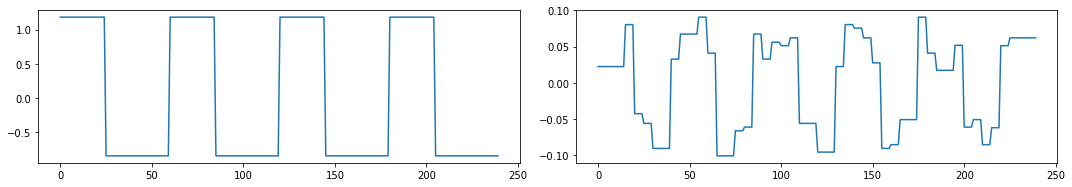

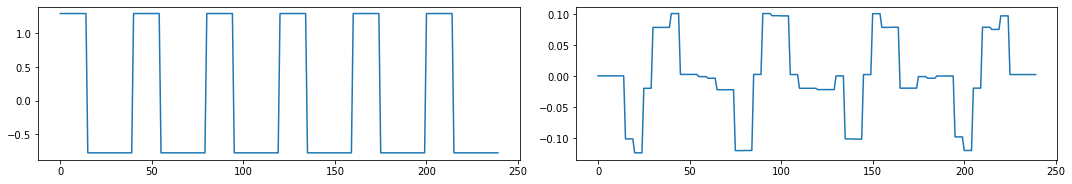

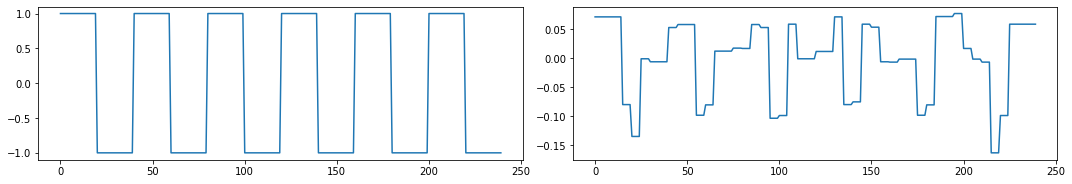

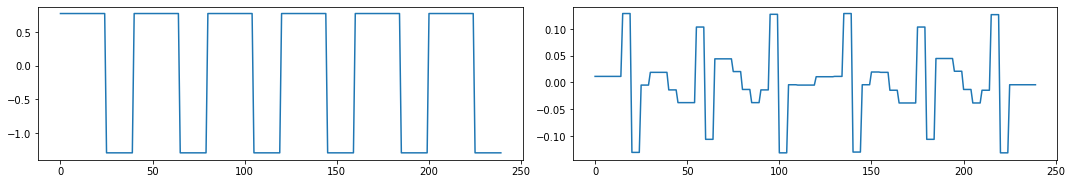

<Figure size 432x288 with 0 Axes>

In [47]:
# plot the regressors of Z and source TCs side by side
for i in range(nsrcs):
    fig = plt.figure(figsize=(15, 15))
    plt.subplot(6, 2, 1)
    plt.plot(TC_df.iloc[:, i])
    
    plt.subplot(6, 2, 2)
    plt.plot(u[:, i])
    plt.tight_layout()
    plt.show()
plt.savefig("../plots/Regressors of Z and sources TCs.png")

In [40]:
def lasso_reg(TC, X, rho):
    
    nsrcs = 6
    step = 1 / ((np.linalg.norm(TC @ np.transpose(TC))*1.1))
    thr = rho * N * step
    Ao = np.zeros((nsrcs,1))
    A = np.zeros((nsrcs,1))
    Alr = np.zeros((nsrcs,x1*x2))
    
    for k in range(x1*x2):
        A = Ao + step * np.dot((np.transpose(TC)), (X[:,k].reshape(240,1) - (TC @ Ao)))
        A = (1/(1+thr)) * (np.sign(A) * np.max([np.zeros(nsrcs), np.transpose(np.abs(A) - thr)[0]], axis = 0).reshape(6,1))
        for i in range(10):
            Ao = A
            A = Ao + step * np.dot((np.transpose(TC)), (X[:,k].reshape(240,1) - (TC @ Ao)))
            A = (1/(1+thr)) * (np.sign(A) * np.max([np.zeros(nsrcs), np.transpose(np.abs(A) - thr)[0]], axis = 0).reshape(6,1))
        Alr[:,k] = A.reshape(1,6)[0]

    return Alr

In [41]:
# using rho=0.001, compute A_PCR and D_PCR

Apcr = lasso_reg(Z, X, 0.001)
Dpcr = X @ Apcr.T

In [42]:
Dpcr_df = pd.DataFrame(Dpcr)

A_pcr = []
a_pcr = np.array(Apcr)

for row in range(nsrcs):
    A_pcr.append(a_pcr[row].reshape((x1, x2)))

In [ ]:
# generate the plots for A_PCR and D_PCR
fig, axes = plt.subplots(6, 2, figsize=(10,20))

for i in range(nsrcs):

    sns.lineplot(data= Dpcr_df.iloc[:,i], ax = axes[i][0])
    axes[i][0].set(xlabel = f"D_PCR {i+1}")
    
    sns.heatmap(data = A_pcr[i], ax = axes[i][1])
    axes[i][1].set(xlabel = f"A_PCR {i+1}")

plt.tight_layout()
plt.show()

plt.savefig('../plots/A_PCR vs. D_PCR.png')